<center><h1>Chen_Pohao_HW7</h1></center>

Name: Po Hao Chen
<br>
Github Username: pohaoc29
<br>
USC ID: 4213309111
<br>
<b>Late day submission: 1 day</b>

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import os,sys
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
df = pd.read_csv('../data/anuran+calls+mfccs/Frogs_MFCCs.csv')
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


#### Split the data

In [3]:
X = df.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
y = df[['Family', 'Genus', 'Species']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

### (b) Train a classifier for each label

#### (i) Research

**Metrics for Multilabel Classification:**

**Exact Match Ratio:**  This metric measures the percentage of instances for which all predicted labels exactly match the true labels.<br>

$MR = \frac1N \Sigma_{i=1}^NI(y_i=\hat y_i)$
<br>Where:
* $N$ is the total number of instances.
* $y_i$ is the true lable set for the $i$th instance.
* $\hat y_i$ is the predicted lable set for the $i$th instance.
* $I()$ is the indicator function, return 1 if the condition is true and 0 otherwise.

Disadvantage of this measure is that it does not distinguish between complete incorrect and partially correct which might be considered harsh.
<br><br>

**Hamming Score/Loss:**  The Hamming Lose is the metric measuring the average fraction of labels that are incorrectly predicted. On the other hand, Hamming Score is the complement of Hamming Loss. (Just replace the unequal sign with equal sign in $I()$ in the formula) <br>

$Hamming Loss = \frac{1}{NL}\Sigma_{i=1}^N\Sigma_{j=1}^LI(y_{ij}\neq\hat y_{ij})$
<br>Where:
* $N$ is the total number of instances.
* $L$ is the total number of labels.
* $y_i$ is the true lable set for the $j$th label of the $i$th instance.
* $\hat y_i$ is the predicted lable set for the $j$th label of the $i$th instance.
* $I()$ is the indicator function, return 1 if the condition is true and 0 otherwise.

Ideally, we would expect the hamming loss to be 0, which would imply no error; practically the smaller the value of hamming loss, the better the performance of the learning algorithm.


#### (ii) Train a SVM for each of the labels

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import hamming_loss


labels = ['Family', 'Genus', 'Species']

for label in labels:
    print(label)
    svmModel = SVC(kernel='rbf') #The radial basis function (RBF) kernel, also known as the Gaussian kernel

    # C: weight of the SVM penalty(lambda); gamma: sigma(width of the Gaussian Kernel)
    C = np.logspace(-6,8,10)
    gamma = np.append(np.logspace(-5, -1, 10), np.logspace(0, 2, 10))
    param_grid = {'C':C, 'gamma':gamma}

    grid_search = GridSearchCV(estimator=svmModel, param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train[label])

    # Evaluate model performance
    best_C = grid_search.best_params_['C']
    print("Best C:", best_C)
    best_gamma = grid_search.best_params_['gamma']
    print("Best gamma:", best_gamma)
    #best_model = grid_search.best_estimator_
    #print("Best score:", grid_search.best_score_)

    # Train final model
    best_SVMmodel = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
    best_SVMmodel.fit(X_train, y_train[label])

    y_pred = best_SVMmodel.predict(X_test)
    hl = hamming_loss(y_test[label],y_pred)
    emr = (y_pred == y_test[label]).mean()
    
    print("Hamming Score(Accuracy):",best_SVMmodel.score(X_test,y_test[label]))
    print("Hamming Loss:",hl)
    print("Exact Match Ratio:",emr)
    print()

Family
Best C: 59.94842503189409
Best gamma: 2.7825594022071245
Hamming Score(Accuracy): 0.9958314034275128
Hamming Loss: 0.0041685965724872626
Exact Match Ratio: 0.9958314034275128

Genus
Best C: 59.94842503189409
Best gamma: 1.6681005372000588
Hamming Score(Accuracy): 0.9907364520611394
Hamming Loss: 0.009263547938860583
Exact Match Ratio: 0.9907364520611394

Species
Best C: 59.94842503189409
Best gamma: 2.7825594022071245
Hamming Score(Accuracy): 0.9893469198703103
Hamming Loss: 0.010653080129689671
Exact Match Ratio: 0.9893469198703103



#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [5]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

labels = ['Family', 'Genus', 'Species']
train_scaler = StandardScaler().fit(X_train)
X_scaled = train_scaler.transform(X_train)

test_scaler = StandardScaler().fit(X_test)
X_test_scaled = test_scaler.transform(X_test)

for label in labels:
    print(label)
    L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000)

    # C: weight of the SVM penalty(lambda)
    C = np.logspace(-6,8,10)
    param_grid = {'C':C}

    grid_search = GridSearchCV(estimator=L1_SVMmodel, param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_scaled, y_train[label])

    # Evaluate model performance
    best_C = grid_search.best_params_['C']
    print("Best C:", best_C)
    #best_model = grid_search.best_estimator_
    #print("Best score:", grid_search.best_score_)

    # Train final model
    best_L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000, C=best_C)
    best_L1_SVMmodel.fit(X_scaled, y_train[label])

    y_pred = best_L1_SVMmodel.predict(X_test_scaled)
    hl = hamming_loss(y_test[label],y_pred)
    emr = (y_pred == y_test[label]).mean()
    
    print("Hamming Score(Accuracy):",best_L1_SVMmodel.score(X_test_scaled,y_test[label]))
    print("Hamming Loss:",hl)
    print("Exact Match Ratio:",emr)
    print()

Family
Best C: 1.6681005372000592
Hamming Score(Accuracy): 0.9258916164891153
Hamming Loss: 0.07410838351088467
Exact Match Ratio: 0.9258916164891153

Genus
Best C: 59.94842503189409
Hamming Score(Accuracy): 0.9388605836035201
Hamming Loss: 0.06113941639647985
Exact Match Ratio: 0.9388605836035201

Species
Best C: 1.6681005372000592
Hamming Score(Accuracy): 0.9583140342751274
Hamming Loss: 0.041685965724872626
Exact Match Ratio: 0.9583140342751274



#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [6]:
from imblearn.over_sampling import SMOTE

labels = ['Family', 'Genus', 'Species']

train_scaler = StandardScaler().fit(X_train)
X_scaled = train_scaler.transform(X_train)

test_scaler = StandardScaler().fit(X_test)
X_test_scaled = test_scaler.transform(X_test)

sm = SMOTE(random_state=42)

for label in labels:
    print(label)
    X_train_res, y_train_res = sm.fit_resample(X_scaled, y_train[label])
    
    L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000)

    # C: weight of the SVM penalty(lambda)
    C = np.logspace(-6,8,10)
    param_grid = {'C':C}

    grid_search = GridSearchCV(estimator=L1_SVMmodel, param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train_res, y_train_res)

    # Evaluate model performance
    best_C = grid_search.best_params_['C']
    print("Best C:", best_C)
    #best_model = grid_search.best_estimator_
    #print("Best score:", grid_search.best_score_)

    # Train final model
    best_L1_SVMmodel = LinearSVC(penalty="l1", dual=False, max_iter=20000, C=best_C)
    best_L1_SVMmodel.fit(X_train_res, y_train_res)

    y_pred = best_L1_SVMmodel.predict(X_test_scaled)
    hl = hamming_loss(y_test[label],y_pred)
    emr = (y_pred == y_test[label]).mean()
    
    print("Hamming Score(Accuracy):",best_L1_SVMmodel.score(X_test,y_test[label]))
    print("Hamming Loss:",hl)
    print("Exact Match Ratio:",emr)
    print()

Family
Best C: 59.94842503189409
Hamming Score(Accuracy): 0.6771653543307087
Hamming Loss: 0.08985641500694766
Exact Match Ratio: 0.9101435849930524

Genus
Best C: 1.6681005372000592
Hamming Score(Accuracy): 0.04307549791570171
Hamming Loss: 0.08707735062528948
Exact Match Ratio: 0.9129226493747105

Species
Best C: 2154.4346900318865
Hamming Score(Accuracy): 0.07827698008337193
Hamming Loss: 0.04307549791570171
Exact Match Ratio: 0.9569245020842982



#### Conclusion
The SVM choosing C and gamma performs better (lower hamming loss and higher EMR) than the others. Also, I have noticed no matter the range of C I change, they tend to choose a specific C(e.g., 59.94842503189409 or 1.6681005372000592) no matter which one. (I have tried different ranges of C/change the logspace() parameters, and it would choose different numbers but still choose specific Cs.) On top of that, all of them easily exceed the accuracy threshold I set(70%); maybe I should raise the threshold more. Unfortunarely, the run time is a little long cannot do more experiment.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

In [7]:
X = df.drop(['Family', 'Genus', 'Species', 'RecordID'], axis=1)
X

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


### (a) Use k-means clustering

### (b) Determine which family is the majority

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import statistics

hamming_dist_50 = list()

for MC_iter in range(50):
    if(MC_iter == 0):
        print(f"The {(MC_iter+1)}st run of Monte-Carlo Simulation:")
    elif(MC_iter == 1):
        print(f"The {(MC_iter+1)}nd run of Monte-Carlo Simulation:")
    elif(MC_iter == 2):
        print(f"The {(MC_iter+1)}rd run of Monte-Carlo Simulation:")
    else:
        print(f"The {(MC_iter+1)}th run of Monte-Carlo Simulation:")
    #----------question 2(a) ----------
    sil_score = list()

    for k in range(2,51): # silhouette must start from 2, number of label can't be 1
        kmeans = KMeans(n_clusters=k).fit(X)
        cluster_labels = kmeans.labels_
        sil_score.append(silhouette_score(X, cluster_labels, metric = 'euclidean')) # I choose Silhouettes in this question.

    best_k = sil_score.index(max(sil_score))+2
    print("The best k chosen by silhouette:", best_k)
    #print("The silhouette score:",max(sil_score)) # confirm the scores are the same

    best_kmeans = KMeans(n_clusters=best_k).fit(X)
    clusters_labels = best_kmeans.fit_predict(X) # same as labels_
    print("The silhouette score:",silhouette_score(X, clusters_labels))
    
    #--------- question 2(b) ----------
    true_labels_df = df[labels]
    features = best_kmeans.feature_names_in_
    labels_df = pd.concat([true_labels_df,pd.Series(clusters_labels, name='clusters_labels')],axis=1)

    majority_triplet = dict()
    majority_labels = dict()

    performance_list = []

    for i in range(best_k): # each cluster (total 4)
        cluster = labels_df[labels_df['clusters_labels'] == i]
        for label in labels: # each label (total 3)
            majority = cluster[label].value_counts().idxmax()
            majority_triplet[label] = majority

        majority_labels['cluster'+str(i)] = majority_triplet

    print("The mojority triplet of each label in each clusters:\n",majority_labels)
    print()


    #---------- question 2(c) ----------

    avg_hd_sum = 0
    avg_hs_sum = 0
    avg_hl_sum = 0

    for i in range(best_k): # each cluster (total 4)
        cluster = labels_df[labels_df['clusters_labels'] == i]

        hdist_sum = 0
        hscore_sum = 0
        hloss_sum = 0
        for label in labels: # each label (total 3)
            majority = cluster[label].value_counts().idxmax()
            majority_triplet[label] = majority


            cluster_hdist = 1-labels_df[label].value_counts()[majority]/len(labels_df[label]) #actually it equals to hamming loss
            hdist_sum += cluster_hdist

            cluster_hscore = labels_df[label].value_counts()[majority]/len(labels_df[label])
            hscore_sum += cluster_hscore

            cluster_hloss = hamming_loss(labels_df[label],pd.Series(majority_triplet[label] for j in range(len(labels_df[label]))))
            hloss_sum += cluster_hloss

        avg_hd_sum += hdist_sum/len(labels)
        avg_hs_sum += hscore_sum/len(labels)
        avg_hl_sum += hloss_sum/len(labels)


    avg_hdist = avg_hd_sum/best_k
    hamming_dist_50.append(avg_hdist)
    
    avg_hscore = avg_hs_sum/best_k
    avg_hloss = avg_hl_sum/best_k    

    print("The hamming distance :", avg_hdist)    
    print("The hamming score :", avg_hscore)    
    print("The hamming loss :", avg_hloss)
    print()
    print()

The 1st run of Monte-Carlo Simulation:
The best k chosen by silhouette: 4
The silhouette score: 0.3787509343305295
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 'cluster1': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 'cluster2': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 'cluster3': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}}

The hamming distance : 0.7361246235811906
The hamming score : 0.2638753764188093
The hamming loss : 0.7361246235811906


The 2nd run of Monte-Carlo Simulation:
The best k chosen by silhouette: 4
The silhouette score: 0.3787509343305295
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 'cluster1': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'S

The best k chosen by silhouette: 4
The silhouette score: 0.37863353074850936
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster1': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster2': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster3': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}

The hamming distance : 0.7361246235811907
The hamming score : 0.2638753764188093
The hamming loss : 0.7361246235811907


The 15th run of Monte-Carlo Simulation:
The best k chosen by silhouette: 4
The silhouette score: 0.3787509343305295
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 'cluster1': {'Family': 'Dendrobatidae', 'Genus': 'Ameerega', 'Species': 'Ameeregatrivittata'}, 'cluster2': {'Family': 'Dendr

The best k chosen by silhouette: 4
The silhouette score: 0.3787509343305295
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 'cluster1': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 'cluster2': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}, 'cluster3': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCinerascens'}}

The hamming distance : 0.7361246235811906
The hamming score : 0.2638753764188093
The hamming loss : 0.7361246235811906


The 28th run of Monte-Carlo Simulation:
The best k chosen by silhouette: 4
The silhouette score: 0.3787509343305295
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster1': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster2': {'Family': 'Hylida

The best k chosen by silhouette: 4
The silhouette score: 0.37863353074850936
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster1': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster2': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster3': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}}

The hamming distance : 0.7361246235811907
The hamming score : 0.2638753764188093
The hamming loss : 0.7361246235811907


The 41th run of Monte-Carlo Simulation:
The best k chosen by silhouette: 4
The silhouette score: 0.3787509343305295
The mojority triplet of each label in each clusters:
 {'cluster0': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster1': {'Family': 'Hylidae', 'Genus': 'Hypsiboas', 'Species': 'HypsiboasCordobae'}, 'cluster2': {'Family': 'Hylidae', 'Genus'

#### Monte-Carlo report

In [9]:
print("The average of the 50 Hamming Distances is:", statistics.mean(hamming_dist_50))
print("The standard deviation of the 50 Hamming Distances is:", statistics.stdev(hamming_dist_50))

The average of the 50 Hamming Distances is: 0.7284665276812601
The standard deviation of the 50 Hamming Distances is: 0.026233526946741855


## 3. ISLR 12.6.2

#### (a) (b)

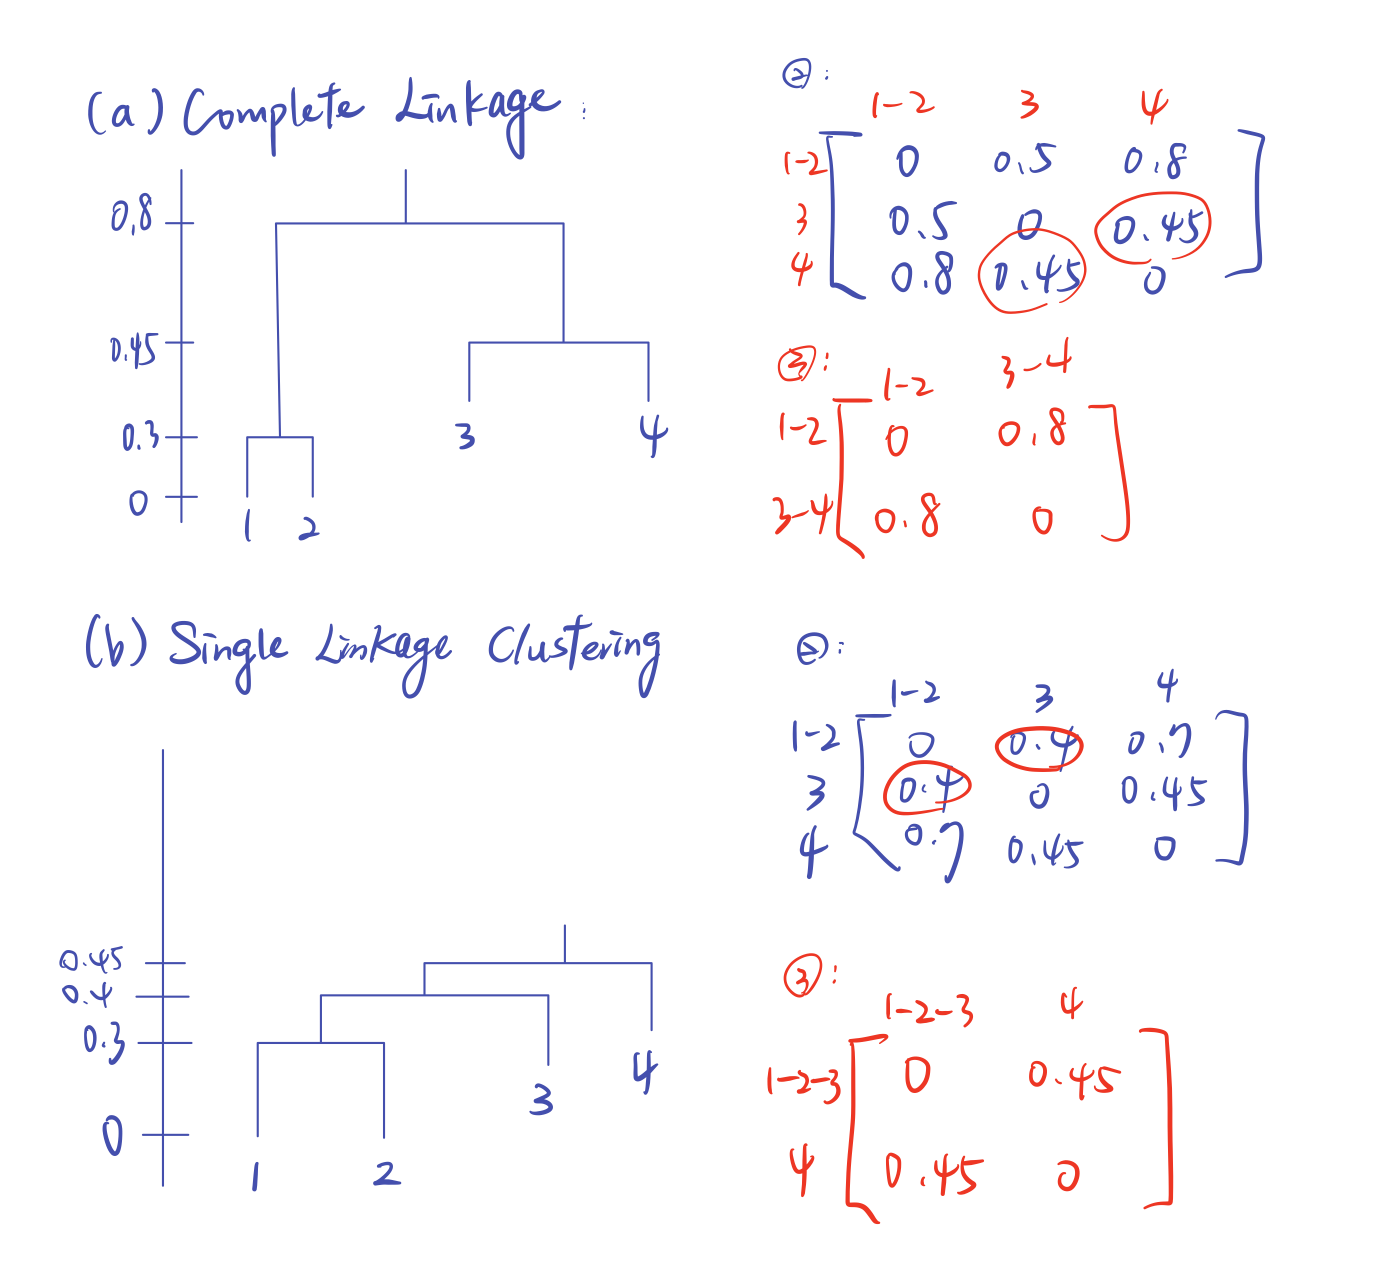

#### (c)
1 and 2 in one cluster and 3 and 4 would be in another cluster.
<br> -> (1,2) and (3,4)

#### (d)
The cluster would be like ((1,2),3) and (4).
<br>1,2 and 3 in one cluster and 4 in another cluster.

#### (e)

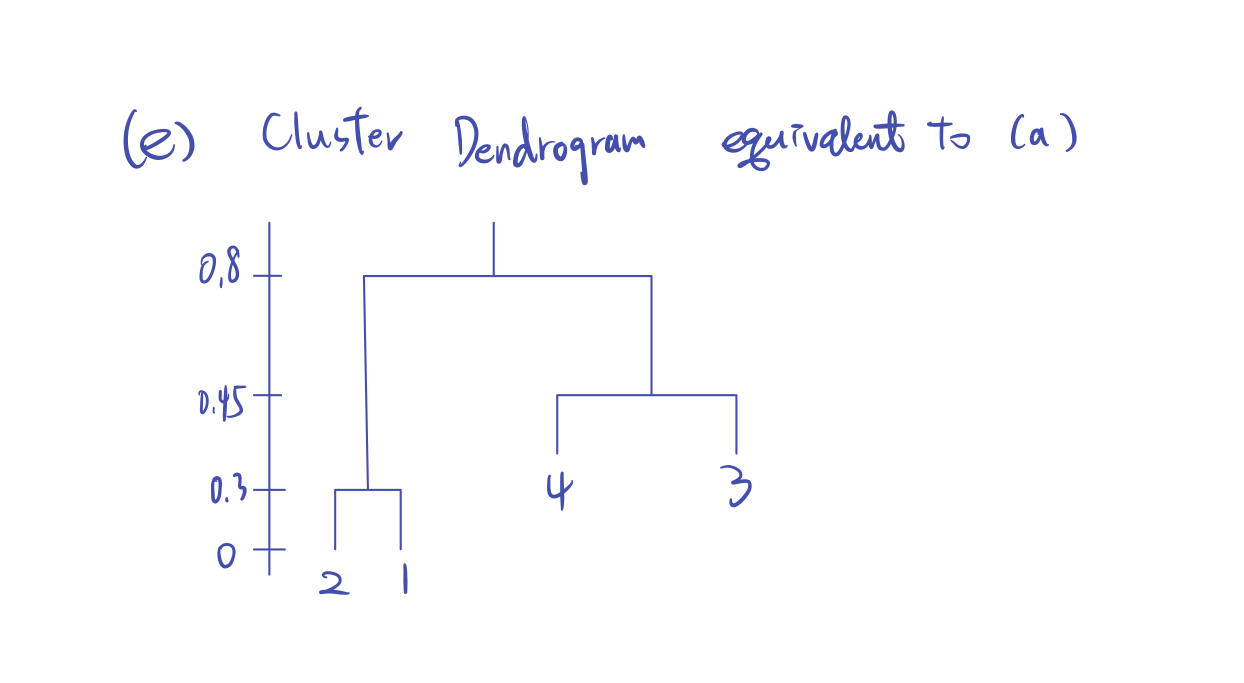